## Section A: Python Programming

Use pytorch to create two perceptron as shown in the figure below:

[1] ![F1](http://172.30.1.73:2103/p/F1.png)

[2] ![F2](http://172.30.1.73:2103/p/F2.png)


[a] Assign proper weights to the neural network to show logical functions like AND, OR and XOR.

[b] Use Autograd to perform gradient descent on the Neural Netowrk Models created above. hint: generate your own dataset by assuming some ground truth about the weights.

```



## Section B: Gradient Descent

* **Linear Regression**: You are provided with two datasets: [car_train.csv](http://172.30.1.73:2103/p/car_train.csv) and [car_test.csv](http://172.30.1.73:2103/p/car_test.csv) Your task is to predict car prices (price) based on the given features using linear regression. Report the loss observed by the trained model on the test set. Also, plot the ground truth and predictions for the test set.

* **Logistic Regression**: You are provided with the [Breat Cancer Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data) containing 30 features for each data point. Convert the diagnosis column to binary labels (1 for Malignant, 0 for Benign). Split the data into training and testing sets. Perform Logistic Regression Classification to train a simple neural network model. Report the Accuracy, Precision and Recall on the test set.


In [ ]:
# write your code here

# SECTION **B**

LINEAR REGRESSION USING **PYTORCH**


---







In [114]:
import torch
from torch.nn import Linear ,Sigmoid , Sequential

import pandas as pd

x_train = pd.read_csv('car_train.csv')
x_test = pd.read_csv('car_test.csv')

x_train.shape


(80, 6)

In [115]:
x_train.head()

,carlength,carwidth,carheight,horsepower,peakrpm,price
0,168.8,64.1,48.8,111,5000,13495.0
1,168.8,64.1,48.8,111,5000,16500.0
2,171.2,65.5,52.4,154,5000,16500.0
3,176.6,66.2,54.3,102,5500,13950.0
4,176.6,66.4,54.3,115,5500,17450.0


In [116]:
y_train = x_train.pop('price')
y_test = x_test.pop('price')

---

In [118]:
x_train.shape

(80, 5)

In [119]:
from sklearn.preprocessing import StandardScaler
x_scale = StandardScaler()
x_train = x_scale.fit_transform(x_train)
x_test = x_scale.transform(x_test)

In [120]:
y_scale = StandardScaler()
y_train = y_scale.fit_transform(y_train.values.reshape(-1,1))
y_test = y_scale.transform(y_test.values.reshape(-1,1))


In [121]:
x_train.shape

(80, 5)

In [122]:
linear_regression = Sequential(Linear(in_features=x_train.shape[1],out_features=1))
print(linear_regression)

Sequential(
  (0): Linear(in_features=5, out_features=1, bias=True)
)


In [123]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(linear_regression.parameters(),lr=0.001)

In [124]:
for _ in range(500):
  optimizer.zero_grad()
  y_pred = linear_regression(torch.from_numpy(x_train).float())
  loss = criterion(y_pred,torch.from_numpy(y_train).float())
  loss.backward()

In [125]:
with torch.no_grad():
  y_pred = linear_regression(torch.from_numpy(x_train).float())
  loss = criterion(y_pred,torch.from_numpy(y_train).float())
  print(" TRAINING LOSS FOR LINEAR REGRESSION =  {:.4f}".format(loss.item()))

 TRAINING LOSS FOR LINEAR REGRESSION =  0.5272


In [126]:
with torch.no_grad():
  y_pred = linear_regression(torch.from_numpy(x_test).float())
  loss = criterion(y_pred,torch.from_numpy(y_test).float())
  print("TEST LOSS FOR LINEAR REGRESSION =  {:.4f}".format(loss.item()))


TEST LOSS FOR LINEAR REGRESSION =  0.4202


In [127]:
y_test = y_scale.inverse_transform(y_test)
y_pred = y_scale.inverse_transform(y_pred.detach().numpy())

In [129]:
y_pred[:5]

array([[18527.291],
       [16746.264],
       [16247.121],
       [16247.121],
       [16247.121]], dtype=float32)

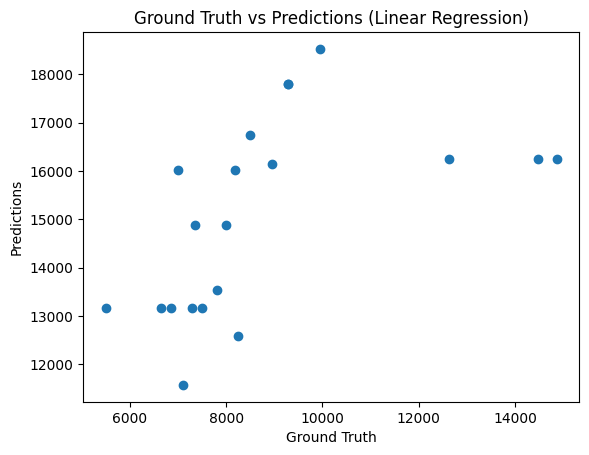

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y_test, y_pred)
plt.xlabel("Ground Truth")
plt.ylabel("Predictions")
plt.title("Ground Truth vs Predictions (Linear Regression)")
plt.show()

LOGISTIC REGRESSION USING **PYTORCH**


---







In [89]:


url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
column_names = ['ID', 'Diagnosis'] + [f'{feat}_{stat}'
    for stat in ['mean','se','worst']
    for feat in ['radius','texture','perimeter','area','smoothness',
                 'compactness','concavity','concave_points','symmetry','fractal_dimension']]

df = pd.read_csv(url, header=None, names=column_names)  # No header in the file
x = df.drop(columns=['ID','Diagnosis'])
y = df['Diagnosis']

In [90]:
logistic_regression = Sequential(
    Linear(in_features=x_train.shape[1],out_features=1),
    Sigmoid()
)
print(logistic_regression)

Sequential(
  (0): Linear(in_features=30, out_features=1, bias=True)
  (1): Sigmoid()
)


In [91]:
y

,Diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [92]:
y = y.map({'M':1,'B':0})

In [93]:
y

,Diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [94]:
x = x.values
y = y.values

In [95]:
from sklearn.preprocessing import StandardScaler

In [97]:
x_scale = StandardScaler()
x = x_scale.fit_transform(x)

In [98]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(logistic_regression.parameters(),lr=0.001)

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [100]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

In [101]:
for epoch in range(500):

  optimizer.zero_grad()
  outputs = torch.squeeze(logistic_regression(X_train))
  loss = criterion(outputs, y_train.float())
  loss.backward()
  optimizer.step()

In [102]:
x_test.shape

(114, 30)

In [103]:
y_train.shape

torch.Size([455])

In [104]:
outputs = [1 if outputs[i] > 0.5 else 0 for i in range(len(outputs))]
outputs

[0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,


In [105]:
with torch.no_grad():
  y_pred = torch.squeeze(logistic_regression(X_test))
  loss = criterion(y_pred,torch.Tensor(y_test.float()))

In [106]:
print(loss.item())

0.3085498809814453


In [107]:
y_pred = [1 if y_pred[i] > 0.5 else 0 for i in range(len(y_pred))]

In [108]:
loss.item()

0.3085498809814453

In [112]:
y_pred = torch.tensor(y_pred)
y_test = torch.tensor(y_test)

In [113]:
TP = ((y_pred == 1) & (y_test == 1)).sum().item()
FP = ((y_pred == 1) & (y_test == 0)).sum().item()
FN = ((y_pred == 0) & (y_test == 1)).sum().item()
TN = ((y_pred == 0) & (y_test == 0)).sum().item()

accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Accuracy: 0.9386
Precision: 0.9737
Recall: 0.8605
